In [64]:
from math import log, floor
from matplotlib import markers
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
plt.rcParams['font.size'] = 12
plt.rcParams['axes.titleweight'] = 'bold'

def millions(x, pos=None):
    """The two args are the value and tick position."""
    return '${:1.0f}M'.format(x*1e-6)


SYMBOL = 'T'
BLUE = '#004BA8'

In [65]:
ticker = yf.Ticker(SYMBOL)

ocf = ticker.cashflow.T['Total Cash From Operating Activities'].sort_index()
capex = ticker.cashflow.T['Capital Expenditures'].sort_index()
fcf = ocf + capex  # capex are already negative

info = ticker.get_info() # TODO

history = ticker.history(start=ocf.index.min())['Close']
fcf_series = fcf.reindex(pd.date_range(start=ocf.index.min(), end=history.index.max())).ffill()




In [66]:
from IPython.display import Markdown as md
md(f"# Report on {SYMBOL}")

# Report on T

## Free Cash Flow

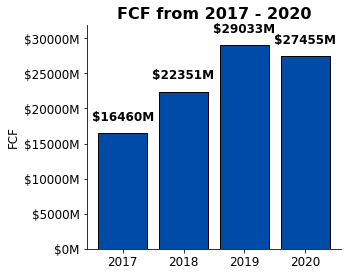

In [67]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(5,4))

years = fcf.index.year
bars = ax.bar(years, fcf, color=BLUE, ec='k')

ax.set_title(f"FCF from {years.min()} - {years.max()}", size=16)
ax.set(
    xticks=years,
    ylim=(0, fcf.max()*1.1),
    ylabel="FCF"
);

ax.bar_label(bars, labels=[millions(x) for x in fcf], padding=10, size=12, weight='bold')
ax.yaxis.set_major_formatter(millions)
sns.despine(ax=ax)
plt.tight_layout()
plt.show()



   
## Price to Free Cash Flow

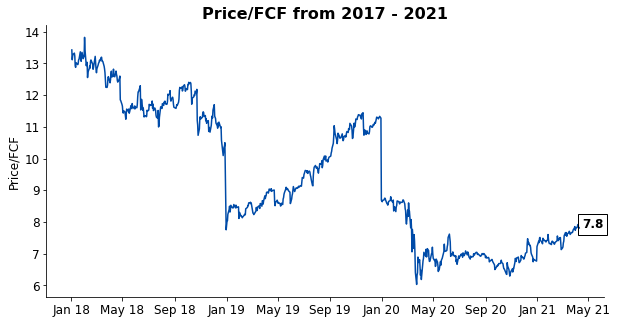

In [68]:
pcf = history/(fcf_series/info['sharesOutstanding'])

fig, ax = plt.subplots(figsize=(10,5))
sns.lineplot(x=pcf.index, y=pcf, ax=ax, color=BLUE)
ax.set_title(f"Price/FCF from {years.min()} - {history.index.max():%Y}", size=16)
ax.xaxis.set_major_formatter(mdates.DateFormatter("%b %y"))
ax.set_ylabel("Price/FCF")
ax.text(
    x=pcf.index.max() + pd.to_timedelta(1, "w"),
    y=pcf[-1],
    s=f"{pcf[-1]:.1f}",
    weight='bold',
    bbox={'boxstyle': 'square', 'fill': None}
    )
sns.despine()


## KPIs

In [71]:
from IPython.display import Markdown, display


include = [
    'payoutRatio',
    'trailingPE',
    'beta',
    'profitMargins'
    # 'marketCap'
]

infodf = pd.DataFrame(
    {'value': [info.get(key, 'N/A') for key in include]}, 
    index=include
    )

display(Markdown(infodf.to_markdown()))

|               | value    |
|:--------------|:---------|
| payoutRatio   |          |
| trailingPE    | N/A      |
| beta          | 0.737451 |
| profitMargins | -0.03014 |